# Project Unit 2 - Visualization
**Fatima Martínez Torres**

I will be working here with the data extracted from Twitter Archiver only due to the amount of information can be extracted from it.

Just bare in mind that this dataset contains 300 entries only, but the information to be obtained from it is valuable.

## Problematic
Social media is a strong media that have been getting recognized and used wordwide. Thus, more organizations, companies, enterprises, opt to take advantage of this technology to be know in their industry gathering their target.

That is nothing but the case of campaigns that promotes the Awarness of differente diseases. In this particular case, Breast Cancer, which has its commemorative month (October) to remember those warriors that have or had been through this challenging war.

The more recognized this event is, the more people interested to help and put the effort to adds. However, there is just a few dependencies that are able to spread their campaigns through social media with success because they know who to contact.

This part of the project aims to the analysis of this years records to spread a Brest Cancer Awareness campaing through Twitter based on the engagement of each post.

In [1]:
import warnings # Library to ommit the warnings on this Notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

## Data Importation
I decided not to use the following columns due to the next reasons:

* **Tweet ID** It does not give valuable information for this project.
* **Media** In this time, I will not work with this data.
* **Location** It barely has records in the dataset.
* **Timezone** It does ot add to this project.
* **Profile Image** I this project, I will not use this type of information.

Thus, I can ommit those columns on the importation of the data.

In [2]:
# Import the csv file obtained from the previous project with only the columns needed
df = pd.read_csv('Data/OctubreRosaTwitterArchiver.csv', usecols=['Date', 'Screen Name', 'Full Name', 'Tweet Text',
                                                                'Link(s)', 'Retweets', 'Favorites', 'App', 'Followers',
                                                                'Follows', 'Listed', 'Verfied', 'User Since',
                                                                'Location.1', 'Bio', 'Website'])

In [3]:
# First 5 records on the dataframe
df.head()

,Date,Screen Name,Full Name,Tweet Text,Link(s),Retweets,Favorites,App,Followers,Follows,Listed,Verfied,User Since,Location.1,Bio,Website
0,21/10/2020 14:26,@CecytemJocot,CECyTEM Jocotitlán,#OctubreRosa. El cáncer de mama se puede preve...,http://salud.edomex.gob.mx,0,0,Twitter for Android,452,132,2,NaN,31/5/2015,"Jocotitlán, México",NaN,http://facebook.com/CecytemPlantelJocotitlan
1,21/10/2020 14:15,@CecytemChicolpn,CECyTEM Chicoloapan,#ÉchaleUnaManoATuSalud #OctubreRosa El cáncer ...,http://salud.edomex.gob.mx,0,0,Twitter Web App,643,393,4,NaN,26/5/2015,Chicoloapan de Juárez,NaN,http://facebook.com/CecytemPlantelChicoloapan
2,21/10/2020 14:14,@CecytemJilotep,CECyTEM Jilotepec,Acude a tu médico o realiza la autoexploración...,NaN,0,0,Twitter for Android,388,165,2,NaN,10/7/2015,NaN,NaN,NaN
3,21/10/2020 14:10,@CESPDEM,@CESPDEM,#ÉchaleUnaManoATuSalud El cáncer de mama se pu...,NaN,0,2,Twitter Media Studio,5520,208,6,NaN,20/8/2015,NaN,Coordinación Estatal del Servicio Profesional ...,http://cespd.edomex.gob.mx
4,21/10/2020 14:08,@MileSalvini,Mi💚,"Algunas se cortan y donan su pelo, otras se lo...",NaN,0,1,Twitter for iPhone,2539,850,0,NaN,26/4/2013,"Santa Fe , Argentina",kinesiología y fisiatria 📚 ig:milesalvini81,NaN


In [4]:
# General information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         300 non-null    object
 1   Screen Name  300 non-null    object
 2   Full Name    300 non-null    object
 3   Tweet Text   300 non-null    object
 4   Link(s)      95 non-null     object
 5   Retweets     300 non-null    int64 
 6   Favorites    300 non-null    int64 
 7   App          300 non-null    object
 8   Followers    300 non-null    int64 
 9   Follows      300 non-null    int64 
 10  Listed       300 non-null    int64 
 11  Verfied      32 non-null     object
 12  User Since   300 non-null    object
 13  Location.1   257 non-null    object
 14  Bio          269 non-null    object
 15  Website      207 non-null    object
dtypes: int64(5), object(11)
memory usage: 37.6+ KB


## Date Time Format
As done in the previous project, I will change the datetime format in case I could take advantage from it later on.

In [5]:
# ARCHIVER_COPY

# Create a new column to separete the Hour from the Date in the index=1, name='Hour', full of 0's
df.insert(1, 'Hour', 0)

# Iteration to slice the columns 'Date'
for index, row in df.iterrows():
    # Last 5 leters on 'Date' goes for the 'Hour' column on its respective index
    df['Hour'][index] = df['Date'][index][-5:]
    # First 6 leter on 'Date' updates the 'Date' column on its respective index
    df['Date'][index] = df['Date'][index][:-6]
    
# Applying format of a datetime data type to the columns 'Date' and 'Hour'
df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = pd.to_datetime(df['Hour'], format='%H:%M').dt.time

In [6]:
# General information of the dataframe to verify that the datatype has successfully changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         300 non-null    datetime64[ns]
 1   Hour         300 non-null    object        
 2   Screen Name  300 non-null    object        
 3   Full Name    300 non-null    object        
 4   Tweet Text   300 non-null    object        
 5   Link(s)      95 non-null     object        
 6   Retweets     300 non-null    int64         
 7   Favorites    300 non-null    int64         
 8   App          300 non-null    object        
 9   Followers    300 non-null    int64         
 10  Follows      300 non-null    int64         
 11  Listed       300 non-null    int64         
 12  Verfied      32 non-null     object        
 13  User Since   300 non-null    object        
 14  Location.1   257 non-null    object        
 15  Bio          269 non-null    object        
 16  Website 

In [7]:
# First 5 records on the dataframe
df.head()

,Date,Hour,Screen Name,Full Name,Tweet Text,Link(s),Retweets,Favorites,App,Followers,Follows,Listed,Verfied,User Since,Location.1,Bio,Website
0,2020-10-21,14:26:00,@CecytemJocot,CECyTEM Jocotitlán,#OctubreRosa. El cáncer de mama se puede preve...,http://salud.edomex.gob.mx,0,0,Twitter for Android,452,132,2,NaN,31/5/2015,"Jocotitlán, México",NaN,http://facebook.com/CecytemPlantelJocotitlan
1,2020-10-21,14:15:00,@CecytemChicolpn,CECyTEM Chicoloapan,#ÉchaleUnaManoATuSalud #OctubreRosa El cáncer ...,http://salud.edomex.gob.mx,0,0,Twitter Web App,643,393,4,NaN,26/5/2015,Chicoloapan de Juárez,NaN,http://facebook.com/CecytemPlantelChicoloapan
2,2020-10-21,14:14:00,@CecytemJilotep,CECyTEM Jilotepec,Acude a tu médico o realiza la autoexploración...,NaN,0,0,Twitter for Android,388,165,2,NaN,10/7/2015,NaN,NaN,NaN
3,2020-10-21,14:10:00,@CESPDEM,@CESPDEM,#ÉchaleUnaManoATuSalud El cáncer de mama se pu...,NaN,0,2,Twitter Media Studio,5520,208,6,NaN,20/8/2015,NaN,Coordinación Estatal del Servicio Profesional ...,http://cespd.edomex.gob.mx
4,2020-10-21,14:08:00,@MileSalvini,Mi💚,"Algunas se cortan y donan su pelo, otras se lo...",NaN,0,1,Twitter for iPhone,2539,850,0,NaN,26/4/2013,"Santa Fe , Argentina",kinesiología y fisiatria 📚 ig:milesalvini81,NaN


## Rename Columns
For practicity, I rename some columns in case I need to work with dot-notation.

In [8]:
# To create the dictionary with the new column names for practicity
to_rename_archiver ={'Screen Name':'UserName', 'Full Name':'FullName', 'Tweet Text':'Tweet', 'User Since':'UserSince', 'Location.1':'Location'}

# Renaming the columns
df = df.rename(columns=to_rename_archiver)

In [9]:
# Verifying that the names has successfully changed
df.columns

Index(['Date', 'Hour', 'UserName', 'FullName', 'Tweet', 'Link(s)', 'Retweets',
       'Favorites', 'App', 'Followers', 'Follows', 'Listed', 'Verfied',
       'UserSince', 'Location', 'Bio', 'Website'],
      dtype='object')

## Visualization
To start with the visualization, I will first investigate with the records to see if I can get valuable facts.

Firstly, I would like to know the accounts that have more posts, which can be done wit the value_counts module.

In [10]:
# Counter of times each UserName tweeted
userNames = df['UserName'].value_counts()

In [11]:
userNames

@VPITV              10
@encaminobb          4
@ITEM_Semov          3
@RevistaHC           3
@comecyt             3
                    ..
@PhilAndTheJets      1
@CafeMarino          1
@SilvanaMagalyM4     1
@AlejandroMaciel     1
@ADNsur              1
Name: UserName, Length: 229, dtype: int64

Once I have done the latter, I would like to know the TOP 3 accounts that post the most while the data were recorded.

In [12]:
# Discriminating all the values that does not correspond to the top 3
top_acc = userNames[:-226].keys().to_list()
top_acc

['@VPITV', '@encaminobb', '@ITEM_Semov']

But it is of my interest to know the percentage of their post among the other posts, to verify that they indeed have an impact on the spread of the Breast Cancer Awareness. Once I would have done that, I might be able to plot a pie chart to see their proportion based on the total of posts in the records.

In [13]:
# Init list
top_tweets = []

# Iterate over the top 3 to calculate its percentage
for i in range(3):
    top_tweets.append(userNames[i]/300)
    
top_tweets

[0.03333333333333333, 0.013333333333333334, 0.01]

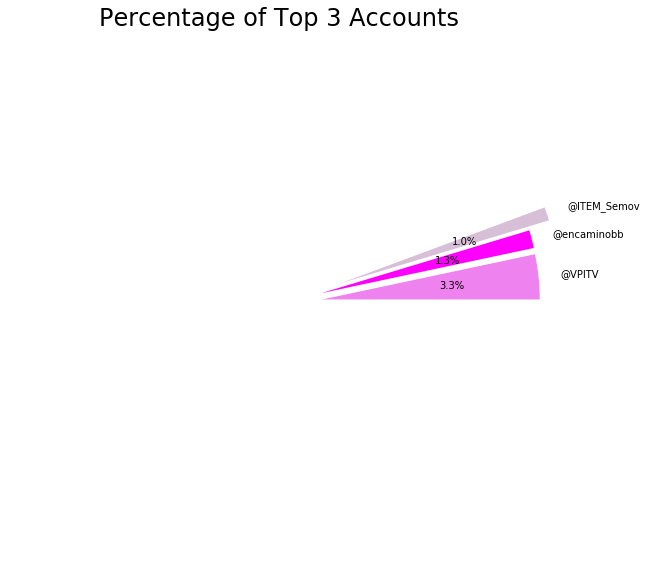

In [14]:
# I decided to use the pink gama of colours to have a balance (Anderson) on the final presentation
colors = ['violet', 'magenta', 'thistle']
explode = (0.2, 0.2, 0.3)
labels = top_acc

# Plot pie chart
plt.figure(figsize=[10,10])
plt.pie(top_tweets, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False)
plt.title('Percentage of Top 3 Accounts', fontsize=24)
plt.savefig('pie.jpg',dpi=500)
plt.show()

They three accounts seem not to be as impacting as I originally would thought. So, I must cosider more variables to relate.
The number of Retweets and the number of Favorites might be a option since they both are considered strong on the social media engagement.

In [15]:
# value_counts on Retweets to see the most Retweets a post can get
df['Retweets'].value_counts()

0     172
1      50
2      25
3      13
4      12
5      10
8       3
6       3
11      2
7       1
61      1
57      1
10      1
12      1
13      1
27      1
29      1
35      1
9       1
Name: Retweets, dtype: int64

In [16]:
# value_count to obtain the first most Retweeted
df['UserName'].where(df['Retweets'] == 61).value_counts()

@Edomex    1
Name: UserName, dtype: int64

In [17]:
# value_count to obtain the second most Retweeted
df['UserName'].where(df['Retweets'] == 57).value_counts()

@SS_Edomex    1
Name: UserName, dtype: int64

In [18]:
# value_count to obtain the thirs most Retweeted
df['UserName'].where(df['Retweets'] == 35).value_counts()

@Independiente    1
Name: UserName, dtype: int64

In [19]:
# Firltering of the most retweeted posts with its respective User Name
mostRT = df['UserName'].where(df['Retweets'] >= 10).value_counts()
mostRT

@Edomex             1
@Adela_Roman        1
@Gabriel_OShea      1
@Independiente      1
@Dra_Guaripete      1
@SS_Edomex          1
@ArturoH19772369    1
@VPITV              1
@SecretariadoGEM    1
@STGedomex          1
Name: UserName, dtype: int64

In [20]:
# value_counts on Favourites to see the most liked post
df['Favorites'].value_counts()

0      114
1       49
2       36
4       21
3       16
5       14
6        7
7        7
9        5
11       5
8        4
13       3
22       2
18       2
15       2
12       1
330      1
103      1
16       1
20       1
21       1
23       1
24       1
27       1
28       1
34       1
56       1
14       1
Name: Favorites, dtype: int64

In [21]:
# Firltering of the most liked posts (greater tha 20 likes) with its respective User Name
mostFav = df['UserName'].where(df['Favorites'] >= 20).value_counts()

And now, I compare in which accounts they both share the most retweeted and the most liked posts.

In [22]:
# Init influencive accounts list
inf_acc = []

# Iteration on the mostFav which is longue (more elements) than mostRT
for key in mostFav.keys():
    # If the account is in both mostFav and mostRT
    if key in mostRT.keys():
        inf_acc.append(key)
        
# Most influencive accounts based on Favorites and Retweets
inf_acc

['@Edomex',
 '@Adela_Roman',
 '@Gabriel_OShea',
 '@Independiente',
 '@SS_Edomex',
 '@SecretariadoGEM',
 '@STGedomex']

I can see that there are 7 accounts which posts are included in both the most Retweeted and the most Liked ones.

But, how much do they post? Is the number of post done related with the engagement of the Retweets and Likes?

In [23]:
# Init dictionary to store as a key the influencive account and the number of posts thet do
no_tweets_inf_acc = {}

# Iteration over the userNames
for k in userNames.keys():
    # If the userName is included in the influencive accounts, the store as a value the amount of posts of that userName
    if k in inf_acc:
        no_tweets_inf_acc[k] = userNames[k]
        
no_tweets_inf_acc

{'@Edomex': 1,
 '@Adela_Roman': 1,
 '@SS_Edomex': 1,
 '@Independiente': 1,
 '@STGedomex': 1,
 '@Gabriel_OShea': 1,
 '@SecretariadoGEM': 1}

Those accounts barely post something related with the Breast Cancer Awareness Month. What if we consider their followers.

In [24]:
# Sort_values by followres
d = df.sort_values(by = 'Followers')
# Last 5 records to cerify that I have sucessfully sorte the values
d.tail()

,Date,Hour,UserName,FullName,Tweet,Link(s),Retweets,Favorites,App,Followers,Follows,Listed,Verfied,UserSince,Location,Bio,Website
129,2020-10-21,16:35:00,@VPITV,VPItv,"El cáncer de mama no distingue de género, raza...",NaN,4,3,Hootsuite Inc.,537519,565,1168,✅,18/12/2015,Venezuela,Canal de Noticias EN VIVO 🔴 I Mira nuestra señ...,http://www.vpitv.com
156,2020-10-21,14:35:00,@VPITV,VPItv,"El cáncer de mama no distingue de género, raza...",NaN,5,7,Hootsuite Inc.,537519,565,1168,✅,18/12/2015,Venezuela,Canal de Noticias EN VIVO 🔴 I Mira nuestra señ...,http://www.vpitv.com
109,2020-10-21,18:35:00,@VPITV,VPItv,"El cáncer de mama no distingue de género, raza...",NaN,11,13,Hootsuite Inc.,537519,565,1168,✅,18/12/2015,Venezuela,Canal de Noticias EN VIVO 🔴 I Mira nuestra señ...,http://www.vpitv.com
273,2020-10-22,16:35:00,@VPITV,VPItv,¡Cuídate y quiérete! Es esencial realizarte un...,NaN,1,7,Hootsuite Inc.,537582,565,1167,✅,18/12/2015,Venezuela,Canal de Noticias EN VIVO 🔴 I Mira nuestra señ...,http://www.vpitv.com
200,2020-10-22,22:05:00,@VPITV,VPItv,¡Cuídate y quiérete! Es esencial realizarte un...,NaN,1,0,Hootsuite Inc.,537582,565,1167,✅,18/12/2015,Venezuela,Canal de Noticias EN VIVO 🔴 I Mira nuestra señ...,http://www.vpitv.com


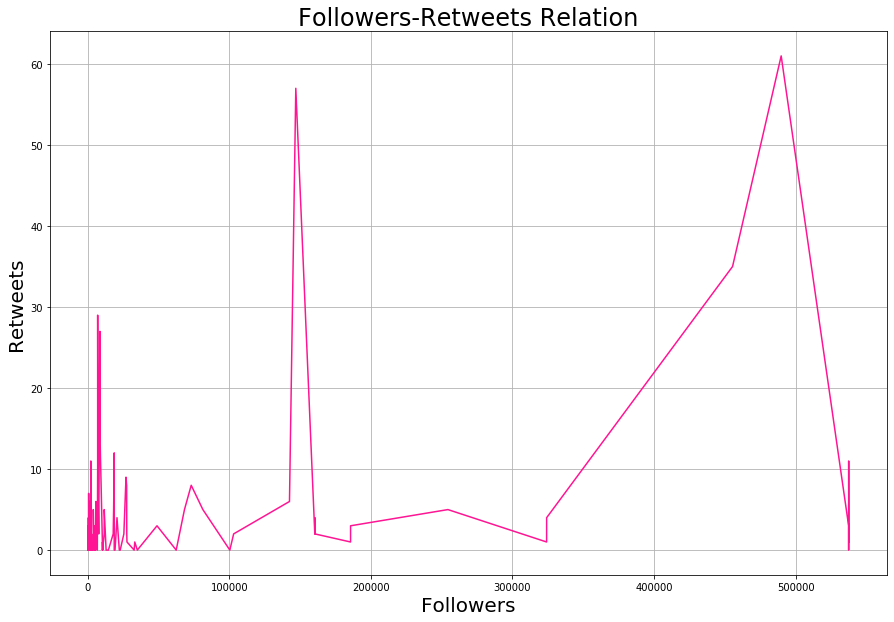

In [25]:
# Line plot all the records to see if there is a relatio bewtee followers and the number of retweets
plt.figure(figsize=[15,10])
plt.grid()
plt.plot(d['Followers'], d['Retweets'], color='deeppink')
plt.title('Followers-Retweets Relation', fontsize=24)
plt.xlabel('Followers', fontsize=20)
plt.ylabel('Retweets', fontsize=20)
plt.savefig('Followers_Retweet.png',dpi=300)

Indeed, the more followers an account have, the more retweets their posts might get. Therefore, I can start to have a idea of the ones I have to gather for my campaign to be known.

But now, how many posts will I need? How much do those influencial accounts post?

In [26]:
# Group by userName al those records which have 150,000 followers or more
influyente = df[df['Followers'] >= 150000].groupby('UserName').count()
# Mean of posts done by influential accounts
infl_mean = influyente.Tweet.mean()

# Group by userName al those records which have less than 150,000 followers
no_influyente = df[df['Followers'] < 150000].groupby('UserName').count()
# Mean of posts done by no influential accounts
no_infl_mean = no_influyente.Tweet.mean()

In [27]:
infl_mean

2.857142857142857

In [28]:
no_infl_mean

1.2612612612612613

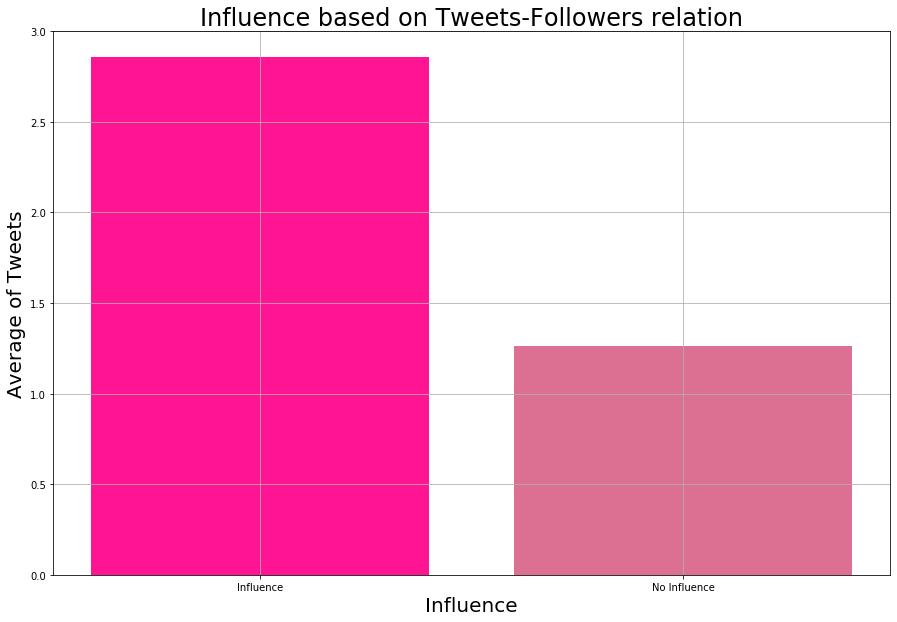

In [29]:
y = [infl_mean, no_infl_mean]
x = ['Influence', 'No Influence']

# Bar plot to identify the difference between the amount of posts that influencial and non influencial accounts do by average
plt.figure(figsize=[15,10])
plt.grid()
plt.title('Influence based on Tweets-Followers relation', fontsize=24)
plt.bar(x, y, color=['deeppink', 'palevioletred'])
plt.xlabel('Influence', fontsize=20)
plt.ylabel('Average of Tweets', fontsize=20)
plt.savefig('Followers_Tweets.png',dpi=300)

## Conclusions
Since all the graphs helps to take important decision, we can conclude that it is worth it to invest on the promotion of any campaing with those influencial accounts for our campaign to be spread as much as wanted. I have shown in this project, that it does not only matters on how much a account post but the engagement their posts has based on their followers.

This project is open to further investigation to get a more accurate result on how and who to spread our campiagn with.

## First Attempt to stablish the hashtag with more engagement
**Status: Failed**